In [13]:
import gzip
import pickle

import numpy as np
import graphviz
from sklearn import tree

In [6]:
mendelian_errors = pickle.load(gzip.open('mendelian_errors.pickle.gz', 'rb'))
feature_fit = np.load(gzip.open('feature_fit.npy.gz', 'rb'))

# Cost function

In [7]:
mendelian_errors[473]

(0, 0)

# Decision Tree

In [11]:
# To remove
ordered_features = sorted(['MQ0', 'QD', 'QUAL', 'FS', 'DP', 'HRun', 'ReadPosRankSum'])

In [8]:
train_X = feature_fit[:,:-1]
train_Y = feature_fit[:,-1]
#feature_names = pickle.load(open('ordered_features', 'rb'))

In [21]:
estimator = tree.DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
tree_fit = estimator.fit(train_X, train_Y)

In [22]:
graphviz_representation = tree.export_graphviz(tree_fit, out_file=None,
                                               feature_names=ordered_features,
                                               filled=True, rounded=True, special_characters=True)
#class_names
graph = graphviz.Source(graphviz_representation)
#render

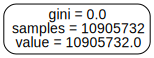

In [23]:
graph

In [17]:
len(train_X), len(train_Y)

(10905732, 10905732)

In [24]:
train_X.shape, train_Y.shape

((10905732, 7), (10905732,))

In [27]:
len([x for x in train_Y if x >0])

0